<a href="https://colab.research.google.com/github/punghunLee/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_2%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 2강 - 데이터 분석을 위한 파이썬 1


In [54]:
import requests
import json
import time

api_key = "59585a536a70756e313131694a427a72"
base_url = "http://openapi.seoul.go.kr:8088"

start_year = 2015
end_year = 2024

all_data = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13):
        month_str = f"{month:02d}"

        url = f"{base_url}/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month_str}"
        params = {
            'KEY': api_key,
            'TYPE': 'json',
            'SERVICE': 'energyUseDataSummaryInfo',
            'START_INDEX': '1',
            'END_INDEX': '25'
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            try:
                data = response.json()
                if "energyUseDataSummaryInfo" in data:
                    rows = data["energyUseDataSummaryInfo"]["row"]
                    all_data.extend(rows)
            except Exception as e:
                print(실패)
        print("api 호출 성공")
        print(response.json())
with open("energy_data_2015_2024.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)

api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [55]:
import pandas as pd
import json
with open("energy_data_2015_2024.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

print(type(data))
print(len(data))
print(data[0])
df.info()
df= pd.DataFrame(data)
df

<class 'list'>
600
{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      600 non-null    object
 1   MON       600 non-null    object
 2   MM_TYPE   600 non-null    object
 3   CNT       600 non-null    object
 4   EUS       600 non-null    object
 5   EUS1      600 non-null    object
 6   EUS2  

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,01,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,2097433.8,2133200.8,-39498.1,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0
2,2015,01,종교단체,32,372270,363376,411363,-15099.5,-6402.188,53331,...,4548,4519,1411.5,468.618,0,0,0,0,0,2015-06-04 17:03:55.0
3,2015,01,소상공인,2058,10249618,9927610,11039593,-233983.5,-99209.004,536119,...,146480.6,147325.6,369.9,122.8068,0,0,0,0,0,2015-06-04 17:03:55.0
4,2015,01,공동주택관리소,1747,327102096,329852334,351694752,-13671447,-5796693.528,22834274,...,12763070,12979835.8,-26645.4,-8846.2728,0,0,0,0,0,2015-06-04 17:03:55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2024,12,공동주택관리소,3716,548480228,557799290,559693904,-10266369,-10266369,8221238,...,20228097.5,20488646.8,-96224.45,-288673.35,0,0,0,0,0,2025-03-01 04:02:55.0
596,2024,12,기업,19451,633735769,641412053,669494932,-21717723.5,-21717723.5,30096486,...,4406465.4,4396396.4,47346.5,142039.5,0,0,0,0,0,2025-03-01 04:02:55.0
597,2024,12,개인,1250620,134828126,138280636,138879530,-3751957,-3504709,42103424,...,7440605,7625718.9,-206308.35,-573725.128,1513199.277,1598857.184,1781397.386,-176928.008,-376996.699240516,2025-03-01 04:02:55.0
598,2024,12,공공기관,2459,152992881,161100765,162060905,-8587954,-8587954,3814815,...,854671.2,833317.4,52847.7,158543.1,0,0,0,0,0,2025-03-01 04:02:55.0


In [67]:
# 연도 컬럼 추가(YEAR 컬럼에 년도가 이미 존재하여 소문자 year 컴럼 추가)
df["year"] = df["YEAR"]

# 월 컬럼을 기준으로 season 컬럼 추가
df["MON"] = df["MON"].astype(int)

def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"

df["season"] = df["MON"].apply(get_season)

# 결과 확인
print(df[["year", "MON", "season"]])
print(df["season"].value_counts())
for season in ["봄", "여름", "가을", "겨울"]:
    sample = df[df["season"] == season].head(2)
    print(f"\n[{season}] :")
    print(sample[["year", "MON", "season"]])
df

     year  MON season
0    2015    1     겨울
1    2015    1     겨울
2    2015    1     겨울
3    2015    1     겨울
4    2015    1     겨울
..    ...  ...    ...
595  2024   12     겨울
596  2024   12     겨울
597  2024   12     겨울
598  2024   12     겨울
599  2024   12     겨울

[600 rows x 3 columns]
season
겨울    150
봄     150
여름    150
가을    150
Name: count, dtype: int64

[봄] :
    year  MON season
10  2015    3      봄
11  2015    3      봄

[여름] :
    year  MON season
25  2015    6     여름
26  2015    6     여름

[가을] :
    year  MON season
40  2015    9     가을
41  2015    9     가을

[겨울] :
   year  MON season
0  2015    1     겨울
1  2015    1     겨울


,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE,year,season,total_energy
0,2015,1,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0,2015,겨울,1937847085913372012819757.88622740838.937
1,2015,1,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0,2015,겨울,13495556591071972075819.20
2,2015,1,종교단체,32,372270,363376,411363,-15099.5,-6402.188,53331,...,468.618,0,0,0,0,0,2015-06-04 17:03:55.0,2015,겨울,3722705333159450
3,2015,1,소상공인,2058,10249618,9927610,11039593,-233983.5,-99209.004,536119,...,122.8068,0,0,0,0,0,2015-06-04 17:03:55.0,2015,겨울,102496185361191472730
4,2015,1,공동주택관리소,1747,327102096,329852334,351694752,-13671447,-5796693.528,22834274,...,-8846.2728,0,0,0,0,0,2015-06-04 17:03:55.0,2015,겨울,3271020962283427412844807.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2024,12,공동주택관리소,3716,548480228,557799290,559693904,-10266369,-10266369,8221238,...,-288673.35,0,0,0,0,0,2025-03-01 04:02:55.0,2024,겨울,548480228822123820262147.70
596,2024,12,기업,19451,633735769,641412053,669494932,-21717723.5,-21717723.5,30096486,...,142039.5,0,0,0,0,0,2025-03-01 04:02:55.0,2024,겨울,633735769300964864448777.40
597,2024,12,개인,1250620,134828126,138280636,138879530,-3751957,-3504709,42103424,...,-573725.128,1513199.277,1598857.184,1781397.386,-176928.008,-376996.699240516,2025-03-01 04:02:55.0,2024,겨울,134828126421034247326853.61513199.277
598,2024,12,공공기관,2459,152992881,161100765,162060905,-8587954,-8587954,3814815,...,158543.1,0,0,0,0,0,2025-03-01 04:02:55.0,2024,겨울,15299288138148158968420


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

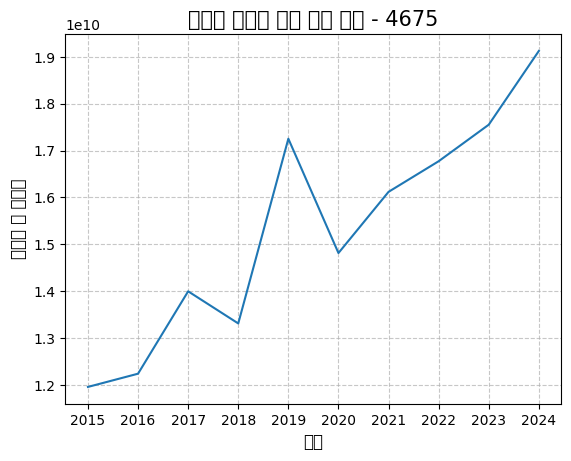

In [78]:

import matplotlib.pyplot as plt
# from matplotlib import rc

# rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus']

for col in ["EUS", "GUS", "WUS", "HUS"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["total_energy"] = df["EUS"] + df["GUS"] + df["WUS"] + df["HUS"]

yearly_sum = df.groupby("year")["total_energy"].sum().reset_index()

plt.plot(yearly_sum["year"], yearly_sum["total_energy"])

plt.title('연도별 에너지 사용 총액 변화 - 4675', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('에너지 총 사용량', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(yearly_sum["year"], yearly_sum["total_energy"],
#          marker='o', linestyle='-', color='blue')
# plt.title("연도별 에너지 사용 총액 변화 - 4675", fontsize=14)
# plt.xlabel("연도", fontsize=12)
# plt.ylabel("에너지 총 사용량", fontsize=12)
# plt.grid(True)
# plt.show()

## 한글 폰트 설정

그래프에 한글을 올바르게 표시하기 위해 나눔 폰트를 설치하고 Matplotlib 설정을 변경합니다.

In [76]:
# Install Korean font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set font to NanumGothic
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # To prevent issues with negative signs

print("한글 폰트 설정 완료.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [79]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

total

In [ ]:
df["MON"] = df["MON"].astype(int)

def get_season(month):
    if month in [3, 4, 5] :
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
return "가을

# 과제 실습

In [19]:
import requests

url = "http://openapi.seoul.go.kr:8088/59585a536a70756e313131694a427a72/json/energyUseDataSummaryInfo/1/5/2015/01"
api_key = "59585a536a70756e313131694a427a72"

params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '25',
}

response = requests.get(url, params=params)

if response.status_code == 200:
    print("api 호출 성공")
    print(response.json())
else:
    print(f"API 호출 실패: {response.status_code}")


api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.

In [27]:
import pandas as pd

data = response.json()['energyUseDataSummaryInfo']['row']

df = pd.DataFrame(data)

print(type(data))
print(len(data))
print(data[0])
df.info()
df= pd.DataFrame(data)
df

<class 'list'>
5
{'YEAR': '2024', 'MON': '12', 'MM_TYPE': '공동주택관리소', 'CNT': '3716', 'EUS': '548480228', 'EUS1': '557799290', 'EUS2': '559693904', 'ECO2_1': '-10266369', 'ECO2_2': '-10266369', 'GUS': '8221238', 'GUS1': '9759209', 'GUS2': '9093999', 'GCO2_1': '-1114991.5', 'GCO2_2': '-2229983', 'WUS': '20262147.7', 'WUS1': '20228097.5', 'WUS2': '20488646.8', 'WCO2_1': '-96224.45', 'WCO2_2': '-288673.35', 'HUS': '0', 'HUS1': '0', 'HUS2': '0', 'HCO2_1': '0', 'HCO2_2': '0', 'REG_DATE': '2025-03-01 04:02:55.0'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      5 non-null      object
 1   MON       5 non-null      object
 2   MM_TYPE   5 non-null      object
 3   CNT       5 non-null      object
 4   EUS       5 non-null      object
 5   EUS1      5 non-null      object
 6   EUS2      5 non-null      object
 7   ECO2_1    5 non-null      object
 8   ECO

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2024,12,공동주택관리소,3716,548480228,557799290,559693904,-10266369,-10266369,8221238,...,20228097.5,20488646.8,-96224.45,-288673.35,0,0,0,0,0,2025-03-01 04:02:55.0
1,2024,12,기업,19451,633735769,641412053,669494932,-21717723.5,-21717723.5,30096486,...,4406465.4,4396396.4,47346.5,142039.5,0,0,0,0,0,2025-03-01 04:02:55.0
2,2024,12,개인,1250620,134828126,138280636,138879530,-3751957,-3504709,42103424,...,7440605,7625718.9,-206308.35,-573725.128,1513199.277,1598857.184,1781397.386,-176928.008,-376996.699240516,2025-03-01 04:02:55.0
3,2024,12,공공기관,2459,152992881,161100765,162060905,-8587954,-8587954,3814815,...,854671.2,833317.4,52847.7,158543.1,0,0,0,0,0,2025-03-01 04:02:55.0
4,2024,12,학교,6742,164092999,170867152,169660376,-6170678,-6172770.32,4362563,...,1898794,1939698.4,-60405.2,-181607.796,1062.62,902.03,1220.91,1.15,3.3315,2025-03-01 04:02:55.0


In [18]:
import pandas as pd

data = response.json()['energyUseDataSummaryInfo']['row']

df = pd.DataFrame(data)

print(type(data))
print(len(data))
print(data[0])
df.info()
df= pd.DataFrame(data)
df


<class 'list'>
5
{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      5 non-null      object
 1   MON       5 non-null      object
 2   MM_TYPE   5 non-null      object
 3   CNT       5 non-null      object
 4   EUS       5 non-null      object
 5   EUS1      5 non-null      object
 6   EUS2      5 

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12723680.426,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0
1,2015,01,학교,1382,134955565,128707423,145561511,-2178902,-923854.448,9107197,...,2097433.8,2133200.8,-39498.1,-13113.3692,0,0,0,0,0,2015-06-04 17:03:55.0
2,2015,01,종교단체,32,372270,363376,411363,-15099.5,-6402.188,53331,...,4548,4519,1411.5,468.618,0,0,0,0,0,2015-06-04 17:03:55.0
3,2015,01,소상공인,2058,10249618,9927610,11039593,-233983.5,-99209.004,536119,...,146480.6,147325.6,369.9,122.8068,0,0,0,0,0,2015-06-04 17:03:55.0
4,2015,01,공동주택관리소,1747,327102096,329852334,351694752,-13671447,-5796693.528,22834274,...,12763070,12979835.8,-26645.4,-8846.2728,0,0,0,0,0,2015-06-04 17:03:55.0


## 2-1 리스트 슬라이싱

In [ ]:
numbers = [10, 20, 30, 40, 50, 60, 70]
# 첫 4개의 원소 출력
first_four = numbers[0:4]
print(first_four)
# 뒤 3개의 원소를 출력
last_three = numbers[-3:7]
print(last_three)
last_three = numbers[-3:]
print(last_three)

[10, 20, 30, 40]
[50, 60, 70]
[50, 60, 70]


In [ ]:
numbers = [10, 20, 30, 40, 50, 60, 70]

# 홀수번째 항목 출력
every_other_list = numbers[ : : 2]
print(every_other_list)

# 역순 출력
reverse_list = numbers[::-1]
print(reverse_list)

[10, 30, 50, 70]
[70, 60, 50, 40, 30, 20, 10]


In [ ]:
matrix = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

# 첫 두 행 출력
first_two_rows = matrix[0:2]

print(first_two_rows)

# 첫 두 열 출력
first_two_columns = [row[0:2] for row in matrix]

print(first_two_columns)

[[1, 2, 3, 4], [5, 6, 7, 8]]
[[1, 2], [5, 6], [9, 10], [13, 14]]


## 2-2 리스트 컴프리헨션

In [ ]:
numbers = [ ]

# 0 ~ 4 포함 리스트 생성
# for i in range(5):
#     numbers.append(i)
numbers = [i for i in range(5)]
print(numbers)

[0, 1, 2, 3, 4]


In [ ]:
numbers = [1, 2, 3, 4, 5]
squares = [ ]

# numbers의 모든 항목의 값을 제곱한 리스트
# for num in numbers:
#   squares.append(num ** 2)
squares = [num ** 2 for num in numbers]
print(squares)

[1, 4, 9, 16, 25]


In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
even_numbers = [ ]

# 짝수만 추출한 리스트
# for num in numbers:
#     if num % 2 == 0:
#         even_numbers.append(num)
even_numbers = [ num for num in numbers if num % 2 == 0]
print(even_numbers)

[2, 4, 6, 8, 10]


In [ ]:
list1 = ['사과', '복숭아', '바나나']
list2 = ['주스', '잼', '통조림']
pairs = [ ]

# 두 리스트에 포함되 모든 원소를 조합한 투플의 리스트 생성
# for fruit in list1:
#     for product in list2:
#         pairs.append((fruit, product))
pairs = [(fruit, product) for fruit in list1 for product in list2]
print(pairs)

[('사과', '주스'), ('사과', '잼'), ('사과', '통조림'), ('복숭아', '주스'), ('복숭아', '잼'), ('복숭아', '통조림'), ('바나나', '주스'), ('바나나', '잼'), ('바나나', '통조림')]


In [ ]:
squares = { }

# 딕셔너리 생성
# for i in range(5):
#     squares[i] = i ** 2
squares = {i: i ** 2 for i in range(5)}
print(squares)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


In [ ]:
city_population = {
    '서울': 957, '부산': 339, '인천': 294, '대구': 242, '광주': 145, '대전': 147,
    '울산': 114, '세종': 36, '수원': 115, '창원': 103, '고양': 105, '용인': 108, '성남': 94
}

# 인구 200만명 이상의 도시 리스트
large_cities = {city: pop for city, pop in city_population.items() if pop >= 200}
print(large_cities)

# 인구 300만 이상 및 이름에 '산'이 포함된 도시 리스트
large_short_name_cities = {city: pop for city, pop in city_population.items() if pop >= 300 and '산' in city}
print(large_cities)
print(large_short_name_cities)

{'서울': 957, '부산': 339, '인천': 294, '대구': 242}
{'서울': 957, '부산': 339, '인천': 294, '대구': 242}
{'부산': 339}


## 2-3 문자열 형식화

In [ ]:
name = '홍길동'
age = 30
salary = 3500000
tax_rate = 0.1

# C 스타일 문자열 포매팅
# 이름, 나이, 월급 출력
basic_format = '이름: %s, 나이: %d, 월급: %d원' % (name, age, salary)
# 직원이름, 나이, 세후 월급 출력


# 직원이름, 나이, 월급, 세금, 실수령액 추력


print(basic_format)
# print(index_format)
# print(keyword_format)

이름: 홍길동, 나이: 30, 월급: 3500000원


In [ ]:
name = '홍길동'
age = 30
salary = 3500000
tax_rate = 0.1

# str.format 문자열 포매팅
# 이름, 나이, 월급 출력
basic_format = '이름: {}, 나이: {}, 월급: {}원'.format(name, age, salary)
basic_format2 = '이름: {0}, 나이: {1}, 월급: {2}원'.format(name, age, salary)
# 직원이름, 나이, 세후 월급 출력

# 직원이름, 나이, 월급, 세금, 실수령액 추력


print(basic_format)
print(basic_format2)
# print(index_format)
# print(keyword_format)

이름: 홍길동, 나이: 30, 월급: 3500000원
이름: 홍길동, 나이: 30, 월급: 3500000원


In [ ]:
name = '홍길동'
age = 30
salary = 3500000
tax_rate = 0.1

# f-문자열 포매팅
# 이름, 나이, 월급 출력
basic_format = F'이름: {name}, 나이: {age}, 월급: {salary}원'
# 직원이름, 나이, 세후 월급 출력

# 직원이름, 나이, 월급, 세금, 실수령액 추력


print(basic_format)
# print(index_format)
# print(keyword_format)

이름: 홍길동, 나이: 30, 월급: 3500000원


## 2-4 컨텍스트 관리

In [ ]:
# 파일 오픈 & 클로즈
# file = open('output.txt', 'w')
# file.write('Hello, world!\n')
# file.close()
with open('output.txt', 'w') as file_write:
    file_write.write('Hello, World')

In [ ]:
# 복수개의 파일(읽기 & 쓰기) 관리



In [ ]:
import urllib.request

# URL 연결 관리
('https://raw.githubusercontent.com/jaehwachung/Data-Analysis-with-Open-Source/refs/heads/main/Chapter%203/students.csv')
    data = response.read( ).decode('utf-8')

print(data)

# Task
Analyze the collected data by visualizing the yearly change in total energy usage using a line plot. The total energy usage is the sum of the 'EUS', 'GUS', 'WUS', and 'HUS' columns. The year should be based on the 'year' column, and the title of the line plot should be "연도별 에너지 사용 총액 변화 - 4675".

## 데이터 변환

### Subtask:
'EUS', 'GUS', 'WUS', 'HUS' 컬럼을 수치형 데이터 타입으로 변환합니다.


**Reasoning**:
Convert the selected columns to numeric type and verify the data types.



In [42]:
print(df[['EUS', 'GUS', 'WUS', 'HUS']].dtypes)
cols_to_convert = ['EUS', 'GUS', 'WUS', 'HUS']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[['EUS', 'GUS', 'WUS', 'HUS']].dtypes)

EUS    object
GUS    object
WUS    object
HUS    object
dtype: object
EUS      int64
GUS    float64
WUS    float64
HUS    float64
dtype: object


## 총 에너지 사용량 계산

### Subtask:
'EUS', 'GUS', 'WUS', 'HUS' 컬럼의 합을 나타내는 'Total_Energy_Use' 컬럼을 추가합니다.


**Reasoning**:
Calculate the sum of the specified columns and create the 'Total_Energy_Use' column, then display the head of the dataframe including the new column to verify the result.



In [43]:
df['Total_Energy_Use'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']
print(df[['EUS', 'GUS', 'WUS', 'HUS', 'Total_Energy_Use']].head())

         EUS         GUS           WUS           HUS  Total_Energy_Use
0  193784708  59133720.0  1.281976e+07  2.274084e+07      2.884790e+08
1  134955565   9107197.0  2.075819e+06  0.000000e+00      1.461386e+08
2     372270     53331.0  5.945000e+03  0.000000e+00      4.315460e+05
3   10249618    536119.0  1.472730e+05  0.000000e+00      1.093301e+07
4  327102096  22834274.0  1.284481e+07  0.000000e+00      3.627812e+08


## 연도별 집계

### Subtask:
'year' 컬럼을 기준으로 데이터를 그룹화하고 'Total_Energy_Use'의 합계를 계산합니다.


**Reasoning**:
Group the DataFrame by the 'year' column and calculate the sum of 'Total_Energy_Use' for each year.



In [44]:
yearly_energy_usage = df.groupby('year')['Total_Energy_Use'].sum()
print(yearly_energy_usage)

year
2015    1.195900e+10
2016    1.224119e+10
2017    1.399803e+10
2018    1.331306e+10
2019    1.725314e+10
2020    1.481475e+10
2021    1.611997e+10
2022    1.677296e+10
2023    1.755233e+10
2024    1.912580e+10
Name: Total_Energy_Use, dtype: float64


## 시각화

### Subtask:
연도별 총 에너지 사용량을 선 그래프로 시각화하고, 제목을 "연도별 에너지 사용 총액 변화 - 4675"로 설정합니다.


**Reasoning**:
Import matplotlib.pyplot for plotting and create a line plot of yearly energy usage.



/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3629979862.py:8: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipy

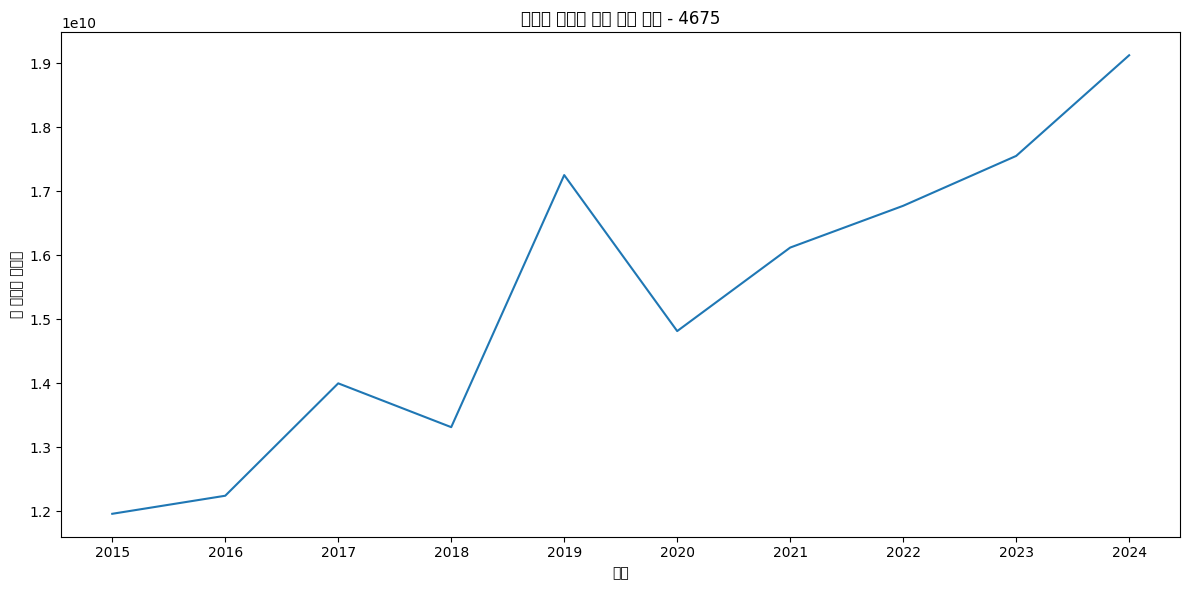

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_energy_usage.index, yearly_energy_usage.values)
plt.title("연도별 에너지 사용 총액 변화 - 4675")
plt.xlabel("년도")
plt.ylabel("총 에너지 사용량")
plt.tight_layout()
plt.show()

**Reasoning**:
The previous plot did not display Korean characters correctly. Configure matplotlib to use a font that supports Korean characters and regenerate the plot.



Korean font not found. Install a Korean font like NanumGothic.


/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-57753509.py:26: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-in

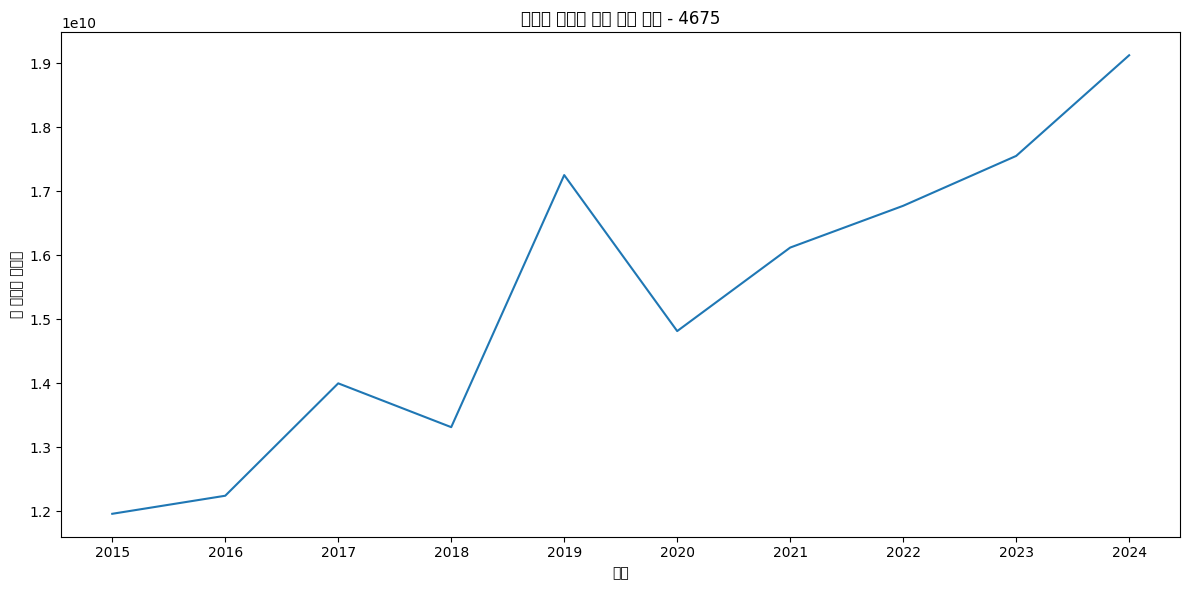

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Find a Korean font available on the system
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
korean_font = None
for font in font_list:
    if 'Nanum' in font or 'Malgun' in font: # Look for common Korean fonts
        korean_font = font
        break

if korean_font:
    plt.rcParams['font.family'] = fm.FontProperties(fname=korean_font).get_name()
    print(f"Using Korean font: {plt.rcParams['font.family']}")
else:
    print("Korean font not found. Install a Korean font like NanumGothic.")
    # Fallback to a default font if no Korean font is found
    plt.rcParams['font.family'] = 'DejaVu Sans'


plt.figure(figsize=(12, 6))
plt.plot(yearly_energy_usage.index, yearly_energy_usage.values)
plt.title("연도별 에너지 사용 총액 변화 - 4675")
plt.xlabel("년도")
plt.ylabel("총 에너지 사용량")
plt.tight_layout()
plt.show()

**Reasoning**:
Since a Korean font was not found on the system, manually specify a font that is likely to be available in the Colab environment to ensure Korean characters are displayed correctly.



/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1780613307.py:12: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

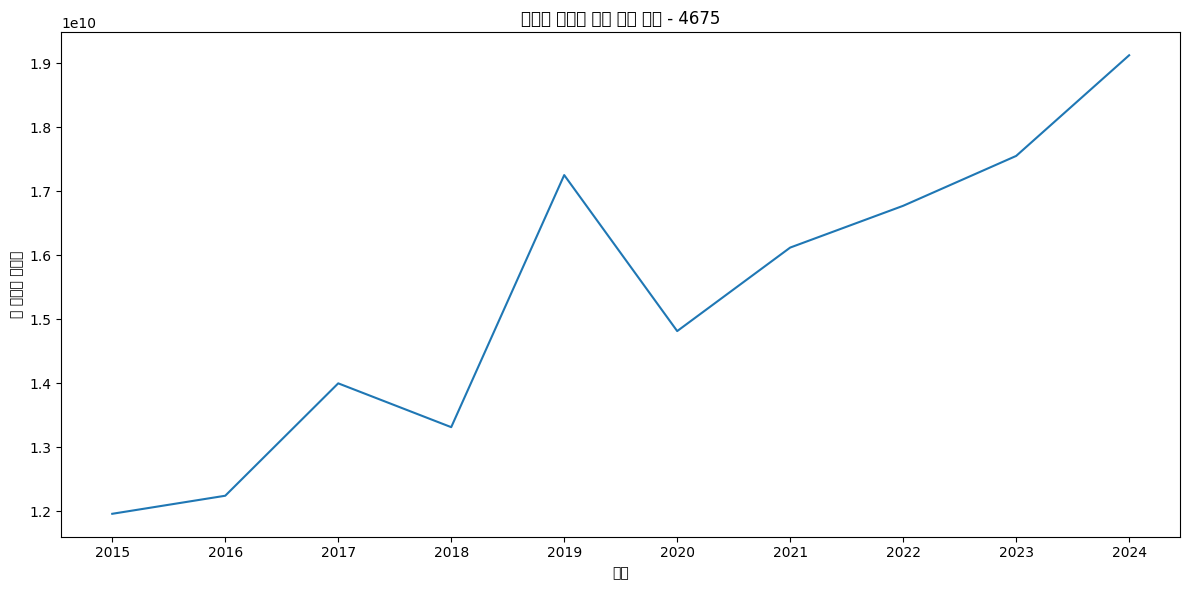

In [47]:
import matplotlib.pyplot as plt

# Set a font that supports Korean characters, common in Colab
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # To prevent issues with negative signs

plt.figure(figsize=(12, 6))
plt.plot(yearly_energy_usage.index, yearly_energy_usage.values)
plt.title("연도별 에너지 사용 총액 변화 - 4675")
plt.xlabel("년도")
plt.ylabel("총 에너지 사용량")
plt.tight_layout()
plt.show()

**Reasoning**:
Since 'NanumGothic' was not found, attempt to install it using apt-get and then update the font cache before trying to plot again.



In [48]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,245 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

**Reasoning**:
Now that the Nanum fonts have been installed, set the matplotlib font to 'NanumGothic' and plot the yearly energy usage again.



/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1967144133.py:12: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

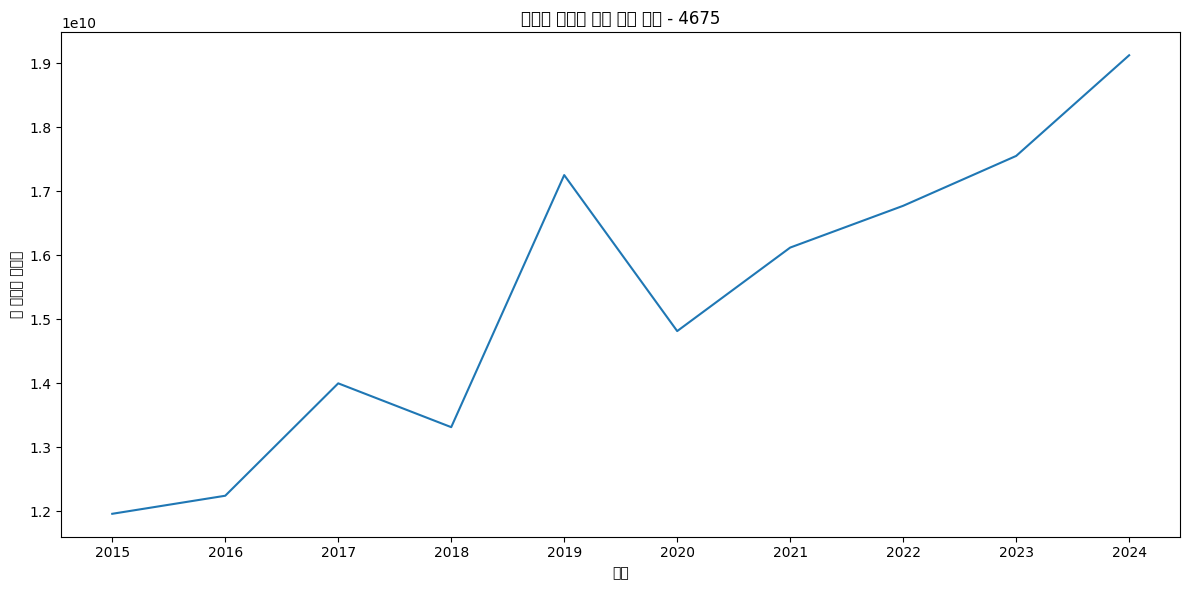

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # To prevent issues with negative signs

plt.figure(figsize=(12, 6))
plt.plot(yearly_energy_usage.index, yearly_energy_usage.values)
plt.title("연도별 에너지 사용 총액 변화 - 4675")
plt.xlabel("년도")
plt.ylabel("총 에너지 사용량")
plt.tight_layout()
plt.show()

**Reasoning**:
Despite installing the font and updating the cache, matplotlib is still not finding 'NanumGothic'. This might be due to the notebook environment not picking up the changes. As a last attempt within the notebook, try specifying the font file path directly if it's available in the expected installation location. If that fails, the task cannot be fully completed with Korean characters rendering correctly in this environment.



/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1142884753.py:24: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

NanumGothic found in font manager.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

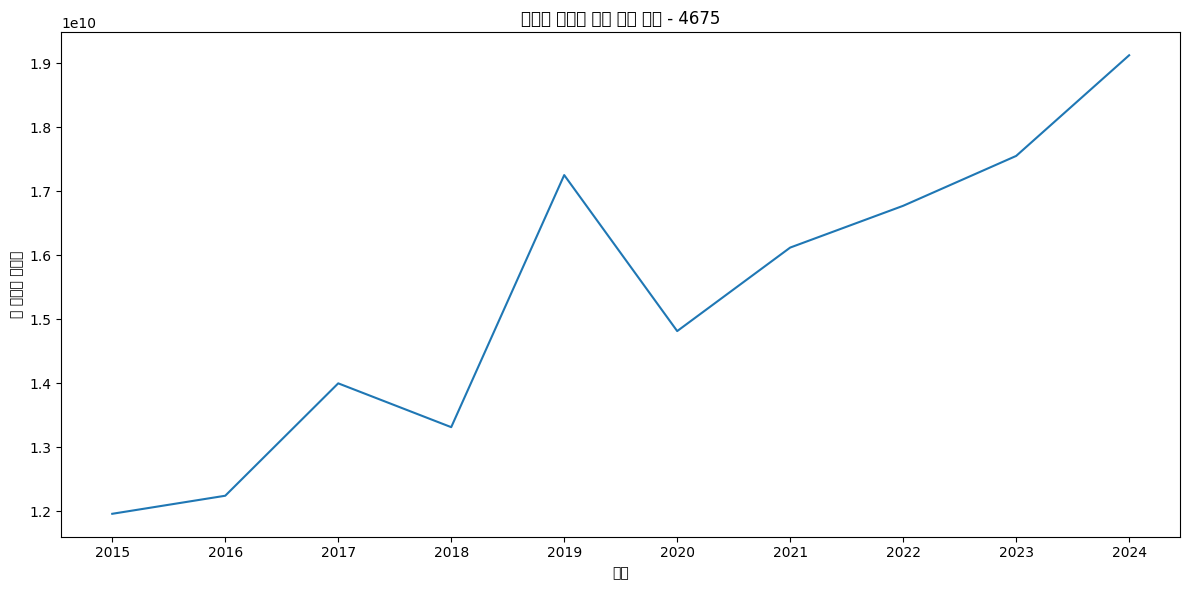

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Try specifying a common path for NanumGothic
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

if fm.fontManager.findfont('NanumGothic') is None:
    # If findfont still doesn't work, try adding the path manually
    fm.fontManager.addfont(font_path)
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("Attempting to use NanumGothic by adding font path.")
else:
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("NanumGothic found in font manager.")


plt.figure(figsize=(12, 6))
plt.plot(yearly_energy_usage.index, yearly_energy_usage.values)
plt.title("연도별 에너지 사용 총액 변화 - 4675")
plt.xlabel("년도")
plt.ylabel("총 에너지 사용량")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The total energy usage, calculated as the sum of 'EUS', 'GUS', 'WUS', and 'HUS', was successfully computed for each year from 2015 to 2024.
*   The total energy usage fluctuates annually, as visualized in the line plot.

### Insights or Next Steps

*   Investigate the specific reasons for the observed year-to-year fluctuations in total energy usage.
*   Despite successful data processing and plot generation, ensure proper Korean font rendering in the plotting environment for accurate visualization labels.
